In [1]:
# import dependencies
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [2]:
df = pd.read_excel("ClaimSupression.xlsx")

In [3]:
print("Shape of the dataframe:", df.shape)
print("\n")
print("columns in the dataframe:", df.columns)
print("\n")
print("summary statistics:",df.describe())

Shape of the dataframe: (589, 31)


columns in the dataframe: Index(['AccountNumber', 'Suppression_Mod', 'AccountName', 'LegalStructure',
       'Structure_mod', 'AccountPostalCode', 'PostalCode_3digits', 'Location',
       'Location_Mod', 'PayrollYear', 'CoverageType', 'CoverageType_Mod',
       'EmployerSize', 'Size_Mod', 'Rate', 'Rate_Mod', 'Rate_Mod2',
       'PreventionPortfolio', 'Industry', 'Industry_Mod', 'IndustrySubSector',
       'IndustrySector', 'SafetyAssociation', 'IndustryRelationship',
       'Levied_Mod', 'ClearanceStatus', 'ClearanceStatus_Mod',
       'FinancialStatus', 'FinancialStatus_Mod',
       'LatePaymentInterestSuppressionOverride', 'LatePayment_Mod'],
      dtype='object')


summary statistics:        AccountNumber  Suppression_Mod  Structure_mod  Location_Mod  \
count   5.890000e+02       589.000000     589.000000    589.000000   
mean    1.275992e+06         0.286927       3.056027      2.680815   
std     6.338936e+05         0.452712       0.332868     

In [4]:
# create a new dataframe with the features we need.
df_new = df[[
    'Suppression_Mod',
    'LegalStructure',
    'Location_Mod',
    'CoverageType',
    'EmployerSize',
    'Rate_Mod2',
    'PreventionPortfolio',
    'IndustrySubSector',
    'Levied_Mod',
    'ClearanceStatus_Mod',
    'FinancialStatus_Mod',
    'LatePayment_Mod',
    ]]

In [5]:
# create a dictionary with the data types of each column in the dataframe.
dtype_dict = dict(df_new.dtypes)
dtype_dict

{'Suppression_Mod': dtype('int64'),
 'LegalStructure': dtype('O'),
 'Location_Mod': dtype('int64'),
 'CoverageType': dtype('O'),
 'EmployerSize': dtype('O'),
 'Rate_Mod2': dtype('int64'),
 'PreventionPortfolio': dtype('O'),
 'IndustrySubSector': dtype('O'),
 'Levied_Mod': dtype('int64'),
 'ClearanceStatus_Mod': dtype('int64'),
 'FinancialStatus_Mod': dtype('int64'),
 'LatePayment_Mod': dtype('int64')}

In [6]:
# create a list of the features with data type as 'O' and another list with datatype as 'int64'.
 
categorical_features = [key for key in dtype_dict.keys() if dtype_dict[key] == 'O'] # This is a list comprehension.
#It creates a list of keys from the dictionary dtype_dict where the value of each key is equal to 'O'.
#List comprehension is a way to create lists from other iterables. It's similar to the map function in functional
# programming languages like Haskell or Lisp.

numerical_features = [key for key in dtype_dict.keys() if dtype_dict[key] == 'int64']

print("categorical features are:", categorical_features)
print('\n')
print("numerical features are:", numerical_features)

categorical features are: ['LegalStructure', 'CoverageType', 'EmployerSize', 'PreventionPortfolio', 'IndustrySubSector']


numerical features are: ['Suppression_Mod', 'Location_Mod', 'Rate_Mod2', 'Levied_Mod', 'ClearanceStatus_Mod', 'FinancialStatus_Mod', 'LatePayment_Mod']


# Inspecting the distribution of the target variable

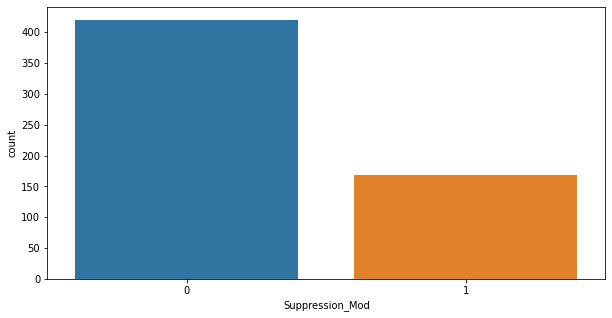

In [7]:
# plot the number of occurences of each value in the column Suppression_Mod as a bar chart.
plt.figure(figsize=(10,5))
sns.countplot(x='Suppression_Mod', data=df_new)
plt.show()

In [8]:
# Upsample the minority class of the target.
df_new_majority = df_new[df_new['Suppression_Mod'] == 0]
df_new_minority = df_new[df_new['Suppression_Mod'] == 1]

df_new_minority_upsampled = resample(df_new_minority, 
                                 replace=True,  # Resampling with replacement means
                                # that we're randomly selecting samples from the minority class
                                # and adding them to our dataset. We do this until there are an
                                # equal number of samples for each class in our target variable,
                                # Suppression_Mod.   
                                 n_samples=len(df_new_majority),    
                                 random_state=123)

df_new_upsampled = pd.concat([df_new_majority, df_new_minority_upsampled])

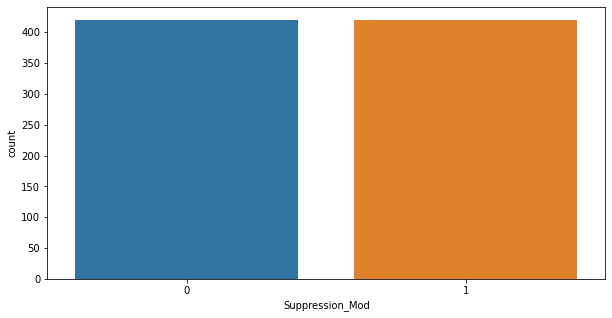

In [9]:
# plot the number of occurences of each value in the column Suppression_Mod as a bar chart.
plt.figure(figsize=(10,5))
sns.countplot(x='Suppression_Mod', data=df_new_upsampled)
plt.show()

# Creating helper functions for model building

In [10]:
# create a dictionary to store the results of the models.
results_dict = {}

# create a function to fit the model and calculate the accuracy.
def fit_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results_dict[model_name] = accuracy

# create a function to print the results of the models.
def print_results():
    for key, value in results_dict.items():
        print(key, ':', value)

# create a function to plot the results of the models.
def plot_results():
    plt.figure(figsize=(10,5))
    plt.bar(range(len(results_dict)), list(results_dict.values()), align='center')
    plt.xticks(range(len(results_dict)), list(results_dict.keys()), rotation=45)
    plt.show()

# Model building with original dataset

In [11]:
# One-hot encode the categorical features.
df_new = pd.get_dummies(df_new, columns=categorical_features)

LogisticRegression : 0.6864406779661016
DecisionTreeClassifier : 0.6101694915254238
RandomForestClassifier : 0.6610169491525424
GradientBoostingClassifier : 0.6949152542372882
KNeighborsClassifier : 0.6440677966101694
SVC : 0.711864406779661
GaussianNB : 0.3305084745762712


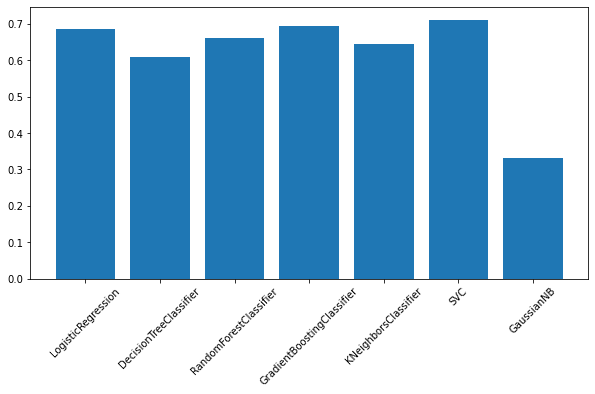

In [12]:
# split the data into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    df_new.drop("Suppression_Mod", axis=1),
    df_new["Suppression_Mod"],
    test_size=0.2,
    random_state=42,
)

# create a list of the models we want to use.
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    KNeighborsClassifier(),
    SVC(),
    GaussianNB(),
]

# fit the models and calculate the accuracy.
for model in models:
    fit_model(model, model.__class__.__name__) # __class__ is a special attribute that returns
                                               # the class of an object. 

# print the results.
print_results()

# plot the results.
plot_results()

In [13]:
# write a loop that will print the f1_score, precision, recall and support for each model.
for model in models:
    y_pred = model.predict(X_test)
    print(model.__class__.__name__)
    print(classification_report(y_test, y_pred))
    print('\n')

LogisticRegression
              precision    recall  f1-score   support

           0       0.71      0.95      0.81        84
           1       0.20      0.03      0.05        34

    accuracy                           0.69       118
   macro avg       0.45      0.49      0.43       118
weighted avg       0.56      0.69      0.59       118



DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.72      0.75      0.73        84
           1       0.30      0.26      0.28        34

    accuracy                           0.61       118
   macro avg       0.51      0.51      0.51       118
weighted avg       0.60      0.61      0.60       118



RandomForestClassifier
              precision    recall  f1-score   support

           0       0.73      0.83      0.78        84
           1       0.36      0.24      0.29        34

    accuracy                           0.66       118
   macro avg       0.55      0.53      0.53       118
weigh

C:\Users\nzahedin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nzahedin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nzahedin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


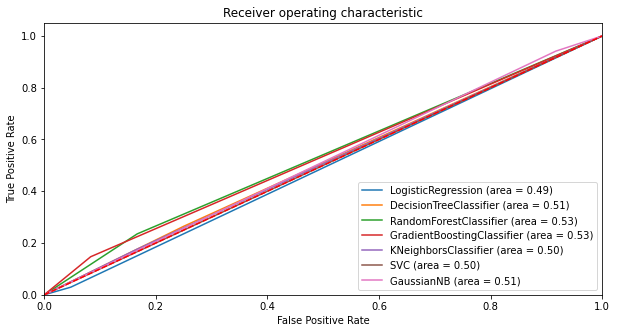

In [14]:
# Write a loop that will plot the ROC Curve of models in one graph.


plt.figure(figsize=(10,5))
for model in models:
    y_pred = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=model.__class__.__name__ + ' (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Model building with upsampled dataset

LogisticRegression : 0.5416666666666666
DecisionTreeClassifier : 0.6488095238095238
RandomForestClassifier : 0.6785714285714286
GradientBoostingClassifier : 0.5714285714285714
KNeighborsClassifier : 0.5833333333333334
SVC : 0.5119047619047619
GaussianNB : 0.5357142857142857


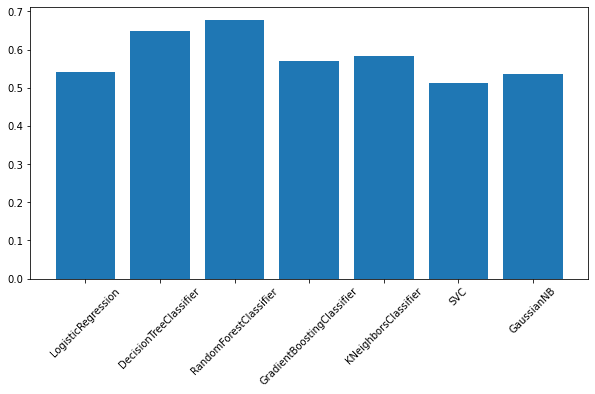

LogisticRegression
              precision    recall  f1-score   support

           0       0.53      0.59      0.55        82
           1       0.56      0.50      0.53        86

    accuracy                           0.54       168
   macro avg       0.54      0.54      0.54       168
weighted avg       0.54      0.54      0.54       168



DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.64      0.63      0.64        82
           1       0.66      0.66      0.66        86

    accuracy                           0.65       168
   macro avg       0.65      0.65      0.65       168
weighted avg       0.65      0.65      0.65       168



RandomForestClassifier
              precision    recall  f1-score   support

           0       0.67      0.67      0.67        82
           1       0.69      0.69      0.69        86

    accuracy                           0.68       168
   macro avg       0.68      0.68      0.68       168
weigh

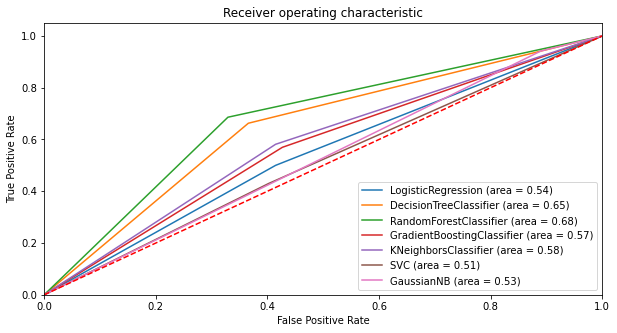

In [15]:
df_new = df[[
    'Suppression_Mod',
    'LegalStructure',
    'Location_Mod',
    'CoverageType',
    'EmployerSize',
    'Rate_Mod2',
    'PreventionPortfolio',
    'IndustrySubSector',
    'Levied_Mod',
    'ClearanceStatus_Mod',
    'FinancialStatus_Mod',
    'LatePayment_Mod',
    ]]

df_new_majority = df_new[df_new['Suppression_Mod'] == 0]
df_new_minority = df_new[df_new['Suppression_Mod'] == 1]

df_new_minority_upsampled = resample(df_new_minority, 
                                 replace=True,     
                                 n_samples=len(df_new_majority),    
                                 random_state=123)

df_new_upsampled = pd.concat([df_new_majority, df_new_minority_upsampled])


df_new_upsampled = pd.get_dummies(df_new_upsampled, columns=categorical_features)


X_train, X_test, y_train, y_test = train_test_split(
    df_new_upsampled.drop("Suppression_Mod", axis=1),
    df_new_upsampled["Suppression_Mod"],
    test_size=0.2,
    random_state=42,
)


models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    KNeighborsClassifier(),
    SVC(),
    GaussianNB(),
]


for model in models:
    fit_model(model, model.__class__.__name__)


print_results()
plot_results()

for model in models:
    y_pred = model.predict(X_test)
    print(model.__class__.__name__)
    print(classification_report(y_test, y_pred))
    print('\n')


plt.figure(figsize=(10,5))
for model in models:
    y_pred = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=model.__class__.__name__ + ' (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

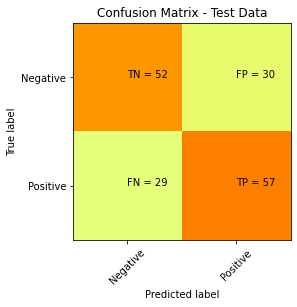

In [16]:
# DecisionTreeClassifier is the most promising algorithm. Plot the confusion matrix for DecisionTreeClassifier.
y_pred = DecisionTreeClassifier().fit(X_train, y_train).predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

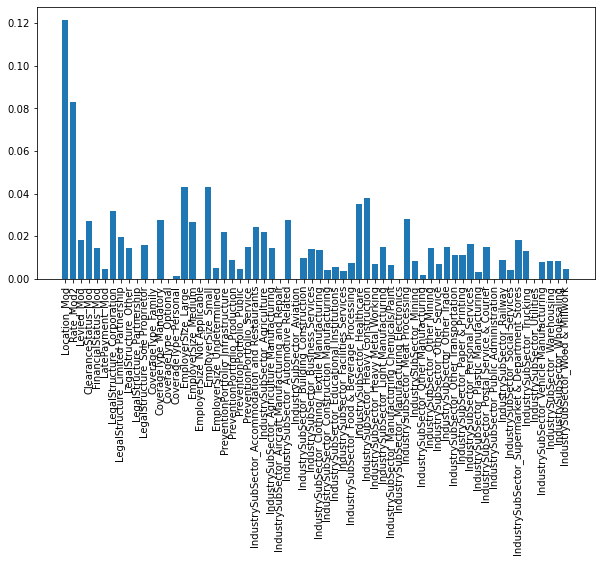

In [17]:
# Plot the feature importance of DecisionTreeClassifier.
model = DecisionTreeClassifier().fit(X_train, y_train)

plt.figure(figsize=(10,5))
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.xticks(range(len(model.feature_importances_)), X_train.columns, rotation=90)
plt.show()

# Hyperparameter tuning of Random Forest Classifier

## Exploring the tree depth parameter on the performance

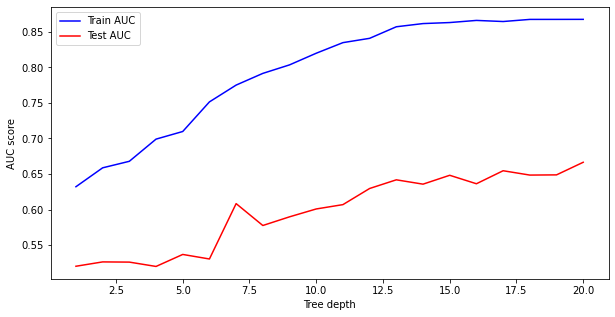

In [18]:
# Using max depth parameter, plot the performance of the model over the training and testing test.

train_results = []
test_results = []

max_depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

plt.figure(figsize=(10, 5))
plt.plot(max_depths, train_results, "b", label="Train AUC")
plt.plot(max_depths, test_results, "r", label="Test AUC")
plt.ylabel("AUC score")
plt.xlabel("Tree depth")
plt.legend()
plt.show()


## Exploring the number of features on the performance

         cv1       cv2       cv3       cv4       cv5       cv6       cv7  \
0   0.686567  0.666667  0.746667  0.724638  0.717949  0.626866  0.739726   
1   0.666667  0.685714  0.739726  0.742857  0.717949  0.628571  0.722222   
2   0.657143  0.685714  0.750000  0.732394  0.717949  0.637681  0.722222   
3   0.666667  0.676471  0.739726  0.732394  0.717949  0.637681  0.712329   
4   0.657143  0.676471  0.760563  0.722222  0.710526  0.637681  0.722222   
5   0.666667  0.686567  0.750000  0.742857  0.708861  0.647059  0.746667   
6   0.684932  0.657143  0.753623  0.722222  0.743590  0.628571  0.739726   
7   0.714286  0.676471  0.750000  0.742857  0.692308  0.637681  0.736842   
8   0.647887  0.686567  0.732394  0.712329  0.727273  0.637681  0.727273   
9   0.694444  0.685714  0.732394  0.732394  0.717949  0.608696  0.746667   
10  0.704225  0.685714  0.732394  0.704225  0.717949  0.628571  0.736842   
11  0.684932  0.666667  0.750000  0.714286  0.708861  0.608696  0.693333   
12  0.647887

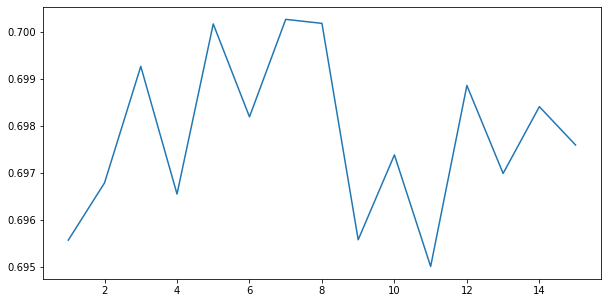

In [22]:
# create a list of the number of features we want to test.
n_features = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

# create a list to store the results of the cross validation.
results = []

# create a loop that will fit the model and calculate the cross validation score.
for n in n_features:
    model = RandomForestClassifier(n_estimators=100, max_features=n, random_state=42)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    scores = cross_val_score(
        model,
        X_train,
        y_train,
        scoring='f1',
        cv=cv,
        n_jobs=-1,
        error_score="raise",
    )
    results.append(scores)

# create a dataframe of the results.
results_df = pd.DataFrame(
    results,
    columns=[
        "cv1",
        "cv2",
        "cv3",
        "cv4",
        "cv5",
        "cv6",
        "cv7",
        "cv8",
        "cv9",
        "cv10",
        "cv11",
        "cv12",
        "cv13",
        "cv14",
        "cv15",
        "cv16",
        "cv17",
        "cv18",
        "cv19",
        "cv20",
        "cv21",
        "cv22",
        "cv23",
        "cv24",
        "cv25",
        "cv26",
        "cv27",
        "cv28",
        "cv29",
        "cv30",
    ],
)

print(results_df)

plt.figure(figsize=(10,5))
plt.plot(n_features, results_df.mean(axis=1))
plt.show()

## Exploring the number of bootstrap sample sizes on the performance

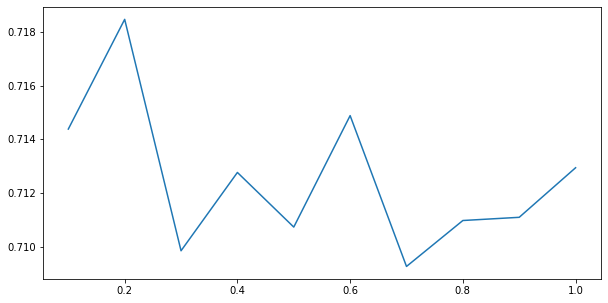

In [21]:
# create a list of the bootstrap sample sizes we want to try.
bootstrap_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# create a list to store the results of the cross validation.
bootstrap_results = []

# create a loop that will fit the model and calculate the accuracy for each bootstrap sample size.
for bootstrap_size in bootstrap_sizes:
    model = RandomForestClassifier(bootstrap=bootstrap_size)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
    bootstrap_results.append(scores.mean())

# plot the results of the cross validation.
plt.figure(figsize=(10,5))
plt.plot(bootstrap_sizes, bootstrap_results)
plt.show()

## Exploring the number of trees on the performance

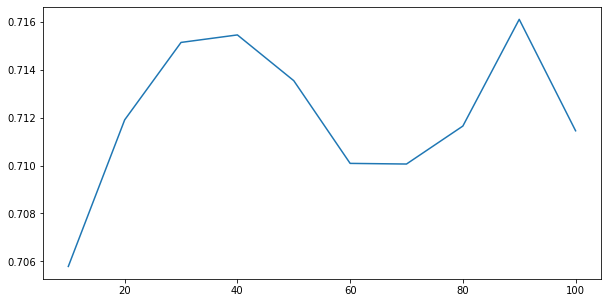

In [75]:
n_estimators = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
estimators_results = []

for n in n_estimators:
    model = RandomForestClassifier(n_estimators=n)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
    estimators_results.append(scores.mean())

plt.figure(figsize=(10,5))
plt.plot(n_estimators, estimators_results)
plt.show()


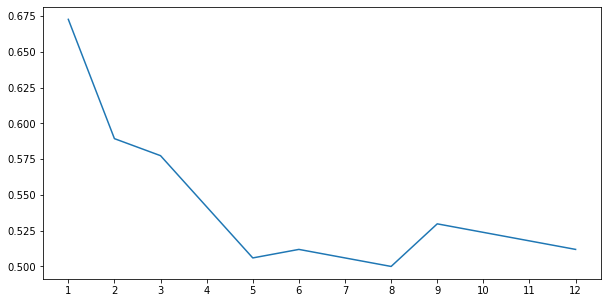

In [187]:
## exploring the number of min_samples_leaf on the performance.

# create a list of the min_samples_leaf values we want to try.
min_samples_leaf_options = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

# create a dictionary to store the results of the models.
results_dict = {}

# create a loop that will fit the model and calculate the accuracy.
for min_samples_leaf in min_samples_leaf_options:
    model = RandomForestClassifier(min_samples_leaf=min_samples_leaf)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results_dict[min_samples_leaf] = accuracy

# plot the results of the models.
plt.figure(figsize=(10,5))
plt.plot(list(results_dict.keys()), list(results_dict.values()))
plt.xticks(list(results_dict.keys()))
plt.show()

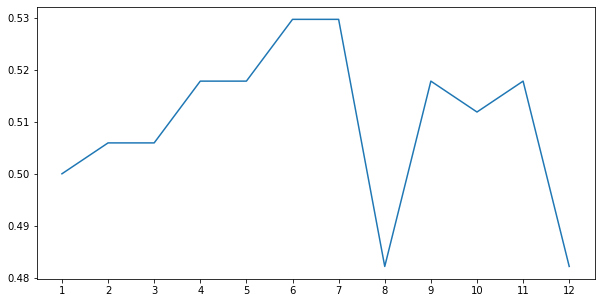

In [223]:
## exploring the number of min_samples_leaf on the performance.

# create a list of the min_samples_leaf values we want to try.
min_samples_split_options = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

# create a dictionary to store the results of the models.
results_dict = {}

# create a loop that will fit the model and calculate the accuracy.
for min_samples_split in min_samples_split_options:
    model = RandomForestClassifier(min_samples_leaf=min_samples_leaf)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results_dict[min_samples_split] = accuracy

# plot the results of the models.
plt.figure(figsize=(10,5))
plt.plot(list(results_dict.keys()), list(results_dict.values()))
plt.xticks(list(results_dict.keys()))
plt.show()

In [27]:
from sklearn.model_selection import GridSearchCV
# define the model
model = RandomForestClassifier()

# define the grid
depth = [2, 3, 4, 5, 6, 7, 8, 9, 10]
features = [2, 3, 4, 5, 6, 7, 8, 9, 10]
bootstrap = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_grid = dict(max_depth=depth, max_features=features, bootstrap=bootstrap)

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='f1_macro')

# execute the grid search
grid_result = grid.fit(X_train, y_train)

In [30]:
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [289]:
model = RandomForestClassifier(bootstrap=0.1, max_depth=30, n_estimators = 75, max_features=5)
anastasia.evsigneeva@gmail.com
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print('Mean accuracy: %.3f' % np.mean(scores))
# print the mean of the fscore.
print(classification_report(y_test, y_pred, output_dict=True)['weighted avg']['f1-score'])

              precision    recall  f1-score   support

           0       0.66      0.66      0.66        82
           1       0.67      0.67      0.67        86

    accuracy                           0.67       168
   macro avg       0.67      0.67      0.67       168
weighted avg       0.67      0.67      0.67       168

Mean accuracy: 0.712
0.6666666666666666


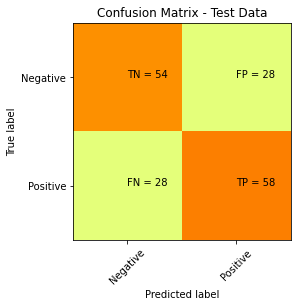

In [290]:
# plot the confusion matrix.
cm = confusion_matrix(y_test, y_pred)

plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()